### Homework 6
#### 4.7 Exercises (10 & 11)

In [1]:
library(ISLR)

#### Exercise 10

##### a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [2]:
head(Weekly)
attach(Weekly)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
4,1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
5,1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
6,1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down


In [3]:
names(Weekly)

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

In [4]:
dim(Weekly)

[1] 1089    9

In [5]:
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

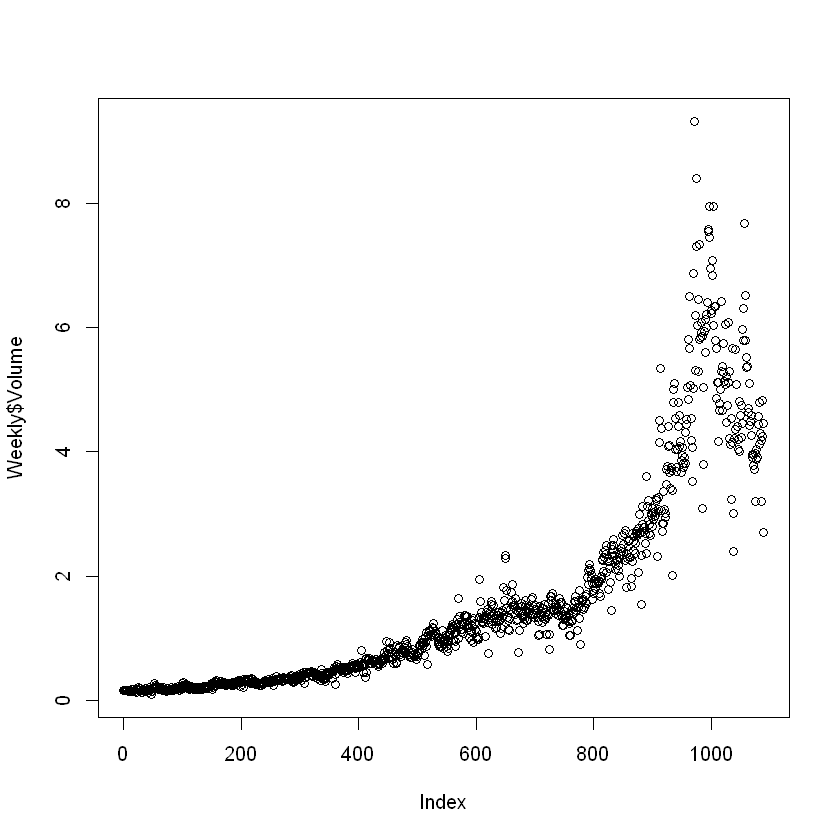

In [6]:
plot(Weekly$Volume)

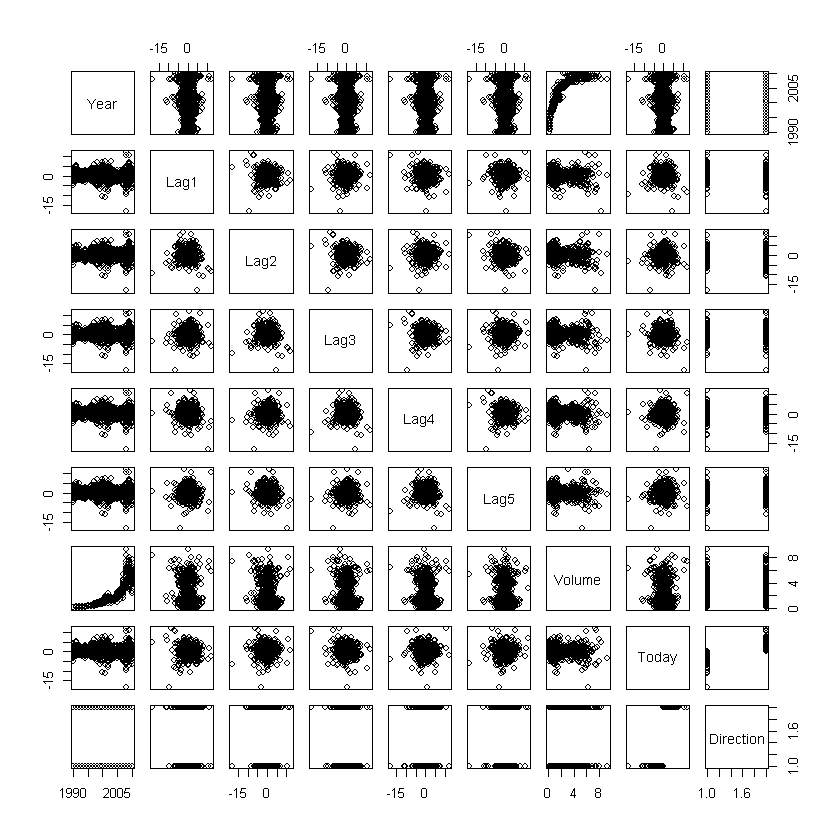

In [7]:
plot(Weekly)

##### b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [8]:
glm1 <-glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = Weekly, 
          family = binomial)
summary(glm1)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


The predictor Lag2 seem to be significant.

##### c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [9]:
glm.probs <-predict(glm1, type = 'response')
glm.probs [1:10]
contrasts(Weekly$Direction)
glm.pred <-rep ('Down' ,1089)
glm.pred[glm.probs >.5]= 'Up'
table(glm.pred, Weekly$Direction)

1         2         3         4         5         6         7         8 
0.6086249 0.6010314 0.5875699 0.4816416 0.6169013 0.5684190 0.5786097 0.5151972 
        9        10 
0.5715200 0.5554287

,Up
Down,0
Up,1


        
glm.pred Down  Up
    Down   54  48
    Up    430 557

In [10]:
mean(glm.pred==Weekly$Direction)

[1] 0.5610652

The diagonal values of the confusion matrix (54 and 557) shows that the model predicted correctly and the off-diagonals shows the false predictions (48 and 430). The model predicts 56.1% of the time correctly. It also shows the error rate: 100-56.1 = 43.9%, where the model predicts incorrect. 

##### d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [11]:
train = (Year<2009)
Weekly.2009 <- Weekly[!train,]
dim(Weekly.2009)
Direction.2009=Direction[!train]

[1] 104   9

In [12]:
glm2 <-glm(Weekly$Direction ~ Lag2, data = Weekly, 
           family = binomial, subset=train)
glm.probs <-predict(glm2, Weekly.2009, type = 'response')
glm.pred = rep('Down', 104)
glm.pred[glm.probs >.5] = 'Up'
table(glm.pred, Direction.2009)

        Direction.2009
glm.pred Down Up
    Down    9  5
    Up     34 56

In [13]:
mean(glm.pred==Direction.2009)

[1] 0.625

In [14]:
mean(glm.pred!=Direction.2009)

[1] 0.375

##### e) Repeat (d) using LDA.

In [15]:
library(MASS)

In [16]:
lda1 <-lda(Weekly$Direction ~ Lag2, data = Weekly, subset=train)
lda1

Call:
lda(Weekly$Direction ~ Lag2, data = Weekly, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

Coefficients of linear discriminants:
           LD1
Lag2 0.4414162

In [17]:
lda.pred <-predict(lda1, Weekly.2009)
names(lda.pred)
lda.class <-lda.pred$class
table(lda.class, Direction.2009)

[1] "class"     "posterior" "x"

         Direction.2009
lda.class Down Up
     Down    9  5
     Up     34 56

In [18]:
mean(lda.class==Direction.2009)

[1] 0.625

In [19]:
mean(lda.class!=Direction.2009)

[1] 0.375

##### f) Repeat (d) using QDA

In [20]:
qda1 <-qda(Weekly$Direction ~ Lag2, data = Weekly, subset=train)
qda1

Call:
qda(Weekly$Direction ~ Lag2, data = Weekly, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

In [21]:
qda.class <-predict(qda1, Weekly.2009)$class
table(qda.class, Direction.2009)

         Direction.2009
qda.class Down Up
     Down    0  0
     Up     43 61

In [22]:
mean(qda.class==Direction.2009)

[1] 0.5865385

In [23]:
mean(qda.class!=Direction.2009)

[1] 0.4134615

##### g) Repeat (d) using KNN with K = 1

In [24]:
library(class)

In [25]:
train.x <-cbind(Lag2)[train,]
test.x <-cbind(Lag2)[!train,]
train.Direction <-Direction[train]
set.seed(1)
knn.pred <-knn(data.frame(train.x), data.frame(test.x), train.Direction, k=1)
table(knn.pred, Direction.2009)

        Direction.2009
knn.pred Down Up
    Down   21 30
    Up     22 31

In [26]:
mean(knn.pred==Direction.2009)
mean(knn.pred!=Direction.2009)

[1] 0.5

[1] 0.5

##### h) Which of these methods appears to provide the best results on this data?

The logistic regression model and the linear discriminant analysis seem to provide better results on this data with an test error of 37.5%. The quadratic discriminant analysis and K-nearest neighbors have higher test error of 41.3, respectively 50%.

##### i) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.

In [27]:
glm.fit <-glm(Weekly$Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = Weekly, 
           family = binomial, subset=train)
glm.probs <-predict(glm.fit, Weekly.2009, type = 'response')
glm.pred = rep('Down', length(glm.probs))
glm.pred[glm.probs >.5] = 'Up'
table(glm.pred, Direction.2009)
mean(glm.pred==Direction.2009)
mean(glm.pred!=Direction.2009)

glm.fit <-glm(Weekly$Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5, data = Weekly, 
           family = binomial, subset=train)
glm.probs <-predict(glm.fit, Weekly.2009, type = 'response')
glm.pred = rep('Down', length(glm.probs))
glm.pred[glm.probs >.5] = 'Up'
table(glm.pred, Direction.2009)
mean(glm.pred==Direction.2009)
mean(glm.pred!=Direction.2009)

glm.fit <-glm(Weekly$Direction ~ Lag1 + Lag2 + Lag3 + Lag4, data = Weekly, 
           family = binomial, subset=train)
glm.probs <-predict(glm.fit, Weekly.2009, type = 'response')
glm.pred = rep('Down', length(glm.probs))
glm.pred[glm.probs >.5] = 'Up'
table(glm.pred, Direction.2009)
mean(glm.pred==Direction.2009)
mean(glm.pred!=Direction.2009)

glm.fit <-glm(Weekly$Direction ~ Lag1 + Lag2 + Lag3, data = Weekly, 
           family = binomial, subset=train)
glm.probs <-predict(glm.fit, Weekly.2009, type = 'response')
glm.pred = rep('Down', length(glm.probs))
glm.pred[glm.probs >.5] = 'Up'
table(glm.pred, Direction.2009)
mean(glm.pred==Direction.2009)
mean(glm.pred!=Direction.2009)

glm.fit <-glm(Weekly$Direction ~ Lag1, data = Weekly, 
           family = binomial, subset=train)
glm.probs <-predict(glm.fit, Weekly.2009, type = 'response')
glm.pred = rep('Down', length(glm.probs))
glm.pred[glm.probs >.5] = 'Up'
table(glm.pred, Direction.2009)
mean(glm.pred==Direction.2009)
mean(glm.pred!=Direction.2009)

        Direction.2009
glm.pred Down Up
    Down   31 44
    Up     12 17

[1] 0.4615385

[1] 0.5384615

        Direction.2009
glm.pred Down Up
    Down   10 14
    Up     33 47

[1] 0.5480769

[1] 0.4519231

        Direction.2009
glm.pred Down Up
    Down    8  8
    Up     35 53

[1] 0.5865385

[1] 0.4134615

        Direction.2009
glm.pred Down Up
    Down    8  9
    Up     35 52

[1] 0.5769231

[1] 0.4230769

        Direction.2009
glm.pred Down Up
    Down    4  6
    Up     39 55

[1] 0.5673077

[1] 0.4326923

In [28]:
lda.fit <-lda(Weekly$Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = Weekly, subset=train)
lda.pred <-predict(lda.fit, Weekly.2009)
lda.class <-lda.pred$class
table(lda.class, Direction.2009)
mean(lda.class==Direction.2009)
mean(lda.class!=Direction.2009)

lda.fit <-lda(Weekly$Direction ~ Lag1 + Lag2 + Lag3 + Lag4, data = Weekly, subset=train)
lda.pred <-predict(lda.fit, Weekly.2009)
lda.class <-lda.pred$class
table(lda.class, Direction.2009)
mean(lda.class==Direction.2009)
mean(lda.class!=Direction.2009)


lda.fit <-lda(Weekly$Direction ~ Lag1 + Lag2 + Lag3, data = Weekly, subset=train)
lda.pred <-predict(lda.fit, Weekly.2009)
lda.class <-lda.pred$class
table(lda.class, Direction.2009)
mean(lda.class==Direction.2009)
mean(lda.class!=Direction.2009)

lda.fit <-lda(Weekly$Direction ~ Lag1, data = Weekly, subset=train)
lda.pred <-predict(lda.fit, Weekly.2009)
lda.class <-lda.pred$class
table(lda.class, Direction.2009)
mean(lda.class==Direction.2009)
mean(lda.class!=Direction.2009)

         Direction.2009
lda.class Down Up
     Down   31 44
     Up     12 17

[1] 0.4615385

[1] 0.5384615

         Direction.2009
lda.class Down Up
     Down    7  8
     Up     36 53

[1] 0.5769231

[1] 0.4230769

         Direction.2009
lda.class Down Up
     Down    8  9
     Up     35 52

[1] 0.5769231

[1] 0.4230769

         Direction.2009
lda.class Down Up
     Down    4  6
     Up     39 55

[1] 0.5673077

[1] 0.4326923

In [29]:
qda.fit <-qda(Weekly$Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = Weekly, subset=train)
qda.class <-predict(qda.fit, Weekly.2009)$class
table(qda.class, Direction.2009)
mean(qda.class==Direction.2009)
mean(qda.class!=Direction.2009)

qda.fit <-qda(Weekly$Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5, data = Weekly, subset=train)
qda.class <-predict(qda.fit, Weekly.2009)$class
table(qda.class, Direction.2009)
mean(qda.class==Direction.2009)
mean(qda.class!=Direction.2009)

qda.fit <-qda(Weekly$Direction ~ Lag1 + Lag2 + Lag3 + Lag4, data = Weekly, subset=train)
qda.class <-predict(qda.fit, Weekly.2009)$class
table(qda.class, Direction.2009)
mean(qda.class==Direction.2009)
mean(qda.class!=Direction.2009)

qda.fit <-qda(Weekly$Direction ~ Lag1 + Lag2 + Lag3, data = Weekly, subset=train)
qda.class <-predict(qda.fit, Weekly.2009)$class
table(qda.class, Direction.2009)
mean(qda.class==Direction.2009)
mean(qda.class!=Direction.2009)

         Direction.2009
qda.class Down Up
     Down   33 49
     Up     10 12

[1] 0.4326923

[1] 0.5673077

         Direction.2009
qda.class Down Up
     Down   10 23
     Up     33 38

[1] 0.4615385

[1] 0.5384615

         Direction.2009
qda.class Down Up
     Down    9 16
     Up     34 45

[1] 0.5192308

[1] 0.4807692

         Direction.2009
qda.class Down Up
     Down    6 10
     Up     37 51

[1] 0.5480769

[1] 0.4519231

In [30]:
train.x <-cbind(Lag2)[train,]
test.x <-cbind(Lag2)[!train,]
train.Direction <-Direction[train]
Direction.2009 <-Direction[!train]
set.seed(1)
knn.pred <-knn(data.frame(train.x), data.frame(test.x), train.Direction, k=3)
table(knn.pred, Direction.2009)
mean(knn.pred==Direction.2009)
mean(knn.pred!=Direction.2009)

knn.pred <-knn(data.frame(train.x), data.frame(test.x), train.Direction, k=5)
table(knn.pred, Direction.2009)
mean(knn.pred==Direction.2009)
mean(knn.pred!=Direction.2009)

knn.pred <-knn(data.frame(train.x), data.frame(test.x), train.Direction, k=10)
table(knn.pred, Direction.2009)
mean(knn.pred==Direction.2009)
mean(knn.pred!=Direction.2009)

knn.pred <-knn(data.frame(train.x), data.frame(test.x), train.Direction, k=50)
table(knn.pred, Direction.2009)
mean(knn.pred==Direction.2009)
mean(knn.pred!=Direction.2009)

knn.pred <-knn(data.frame(train.x), data.frame(test.x), train.Direction, k=100)
table(knn.pred, Direction.2009)
mean(knn.pred==Direction.2009)
mean(knn.pred!=Direction.2009)

        Direction.2009
knn.pred Down Up
    Down   16 20
    Up     27 41

[1] 0.5480769

[1] 0.4519231

        Direction.2009
knn.pred Down Up
    Down   15 20
    Up     28 41

[1] 0.5384615

[1] 0.4615385

        Direction.2009
knn.pred Down Up
    Down   19 19
    Up     24 42

[1] 0.5865385

[1] 0.4134615

        Direction.2009
knn.pred Down Up
    Down   21 23
    Up     22 38

[1] 0.5673077

[1] 0.4326923

        Direction.2009
knn.pred Down Up
    Down    9 13
    Up     34 48

[1] 0.5480769

[1] 0.4519231

In none of the cases the models seem to work better than with only the predictor 'Lag2'. 

#### Exercise 11

##### a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.

In [31]:
head(Auto)
attach(Auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


In [32]:
summary(Auto)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

In [33]:
names(Auto)

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
[6] "acceleration" "year"         "origin"       "name"

In [34]:
mpg01 <- ifelse(mpg > median(mpg), yes=1, no=0)
df <-data.frame(Auto, mpg01)
head(df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,0
2,15,8,350,165,3693,11.5,70,1,buick skylark 320,0
3,18,8,318,150,3436,11.0,70,1,plymouth satellite,0
4,16,8,304,150,3433,12.0,70,1,amc rebel sst,0
5,17,8,302,140,3449,10.5,70,1,ford torino,0
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500,0


##### b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

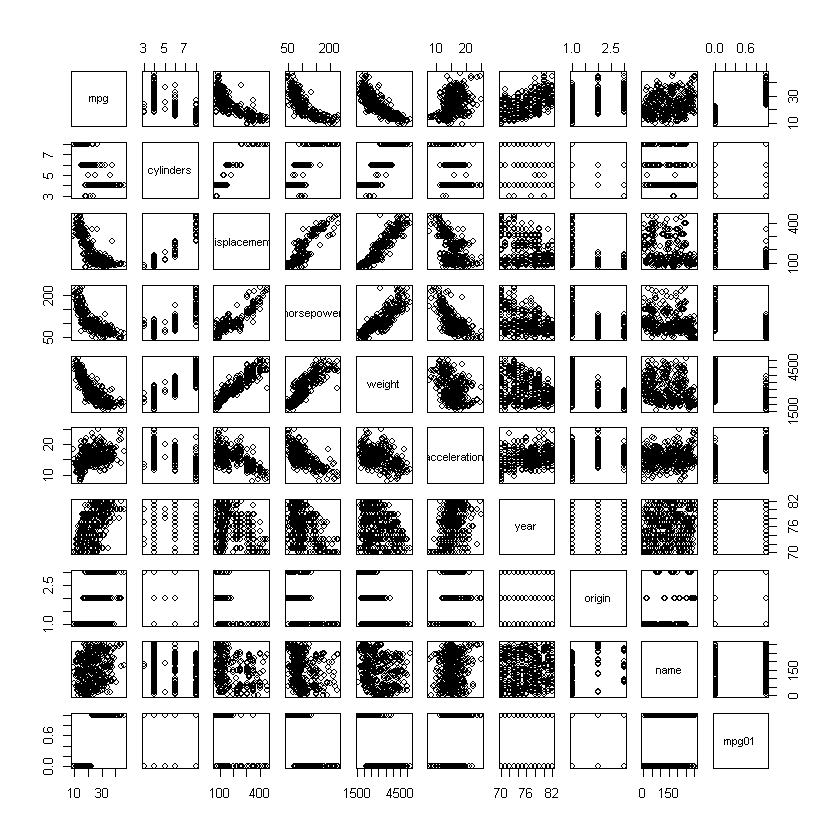

In [35]:
plot(df)

The variables displacement, horsepower, weight and mpg seem to be useful for predicting mpg01.

##### c) Split the data into a training set and a test set.

In [36]:
train <-(year < 79)
test <- !train
Auto.train <- Auto[train,]
Auto.test <- Auto[test,]
mpg01.test = mpg01[!train]

##### d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [37]:
lda <-lda(mpg01 ~ displacement + horsepower + weight, data = df, subset = train)
lda.class <-predict(lda, Auto.test)$class
table(lda.class, mpg01.test)
mean(lda.class==mpg01.test)
mean(lda.class!=mpg01.test)

         mpg01.test
lda.class  0  1
        0 18 13
        1  0 83

[1] 0.8859649

[1] 0.1140351

The test error of the model is 0.114 ->11.4%.

##### e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [38]:
qda <-qda(mpg01 ~ displacement + horsepower + weight, data = df, subset = train)
qda.class <-predict(qda, Auto.test)$class
table(qda.class, mpg01.test)
mean(qda.class!=mpg01.test)

         mpg01.test
qda.class  0  1
        0 18 20
        1  0 76

[1] 0.1754386

The test error of this model is 17.5%. 

##### f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [39]:
glm <-glm(mpg01 ~ displacement + horsepower + weight, data = df, subset = train)
glm.probs <-predict(glm, Auto.test, type = 'response')
glm.pred = rep(0, length(glm.probs))
glm.pred[glm.probs >.5] = 1
table(glm.pred, mpg01.test)
mean(glm.pred!=mpg01.test)

        mpg01.test
glm.pred  0  1
       0 18 13
       1  0 83

[1] 0.1140351

The test error of this model is 11.4%.

##### g) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [40]:
train.x <-cbind(displacement, horsepower, weight)[train,]
test.x <-cbind(displacement, horsepower, weight)[test,]
train.mpg01 <-mpg01[train]

In [41]:
set.seed(1)
knn.pred <-knn(train.x, test.x, train.mpg01, k=1)
table(knn.pred, mpg01.test)
mean(knn.pred!=mpg01.test)

        mpg01.test
knn.pred  0  1
       0 16 24
       1  2 72

[1] 0.2280702

In [42]:
knn.pred <-knn(train.x, test.x, train.mpg01, k=3)
table(knn.pred, mpg01.test)
mean(knn.pred!=mpg01.test)

        mpg01.test
knn.pred  0  1
       0 18 26
       1  0 70

[1] 0.2280702

In [43]:
knn.pred <-knn(train.x, test.x, train.mpg01, k=10)
table(knn.pred, mpg01.test)
mean(knn.pred!=mpg01.test)

        mpg01.test
knn.pred  0  1
       0 18 21
       1  0 75

[1] 0.1842105

In [44]:
knn.pred <-knn(train.x, test.x, train.mpg01, k=30)
table(knn.pred, mpg01.test)
mean(knn.pred!=mpg01.test)

        mpg01.test
knn.pred  0  1
       0 18 20
       1  0 76

[1] 0.1754386

In [45]:
knn.pred <-knn(train.x, test.x, train.mpg01, k=40)
table(knn.pred, mpg01.test)
mean(knn.pred!=mpg01.test)

        mpg01.test
knn.pred  0  1
       0 18 24
       1  0 72

[1] 0.2105263

For K=1 the test error is 22.8%. The lowest test error seem to be for K=30, 17.5%.